In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''The maximum user numbers are 5000, but i need 10k, so I'm going to load 2 datasets and concatinate them.
I am using "seed=" parameter to generate the same dataset each time'''

df1 = pd.read_csv('https://randomuser.me/api/?format=csv&results=5000&seed=16')
df2 = pd.read_csv('https://randomuser.me/api/?format=csv&results=5000&seed=27')
df = pd.concat([df1, df2], ignore_index=True)
# df.to_csv('aiincubator.csv', index=False)  # optional. Just for safety


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          10000 non-null  object 
 1   name.title                      10000 non-null  object 
 2   name.first                      10000 non-null  object 
 3   name.last                       10000 non-null  object 
 4   location.street.number          10000 non-null  int64  
 5   location.street.name            10000 non-null  object 
 6   location.city                   10000 non-null  object 
 7   location.state                  10000 non-null  object 
 8   location.country                10000 non-null  object 
 9   location.postcode               10000 non-null  object 
 10  location.coordinates.latitude   10000 non-null  float64
 11  location.coordinates.longitude  10000 non-null  float64
 12  location.timezone.offset        1

In [22]:
'''my favorite way to get a little bit deeper information about dataset values'''
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

gender : ['female' 'male']
name.title : ['Mrs' 'Mr' 'Miss' 'Monsieur' 'Ms' 'Madame' 'Mademoiselle']
name.first : ['Kata' 'Esteban' 'Adelina' ... 'Evamaria' 'Yorick' 'Devran']
name.last : ['Jüttner' 'Pastor' 'Kvamsdal' ... 'Melvold' 'Pustjens' 'Slobbe']
location.street.number : [ 555 1712  527 ...  603  844 9271]
location.street.name : ['Bahnhofstraße' 'Avenida del Planetario' 'Skippergata' ... 'Fredveien'
 'Hulsforthofweg' 'Ingstraat']
location.city : ['Furth im Wald' 'Pontevedra' 'Tveteneåsen' ... 'Ferrera' 'Lubbock'
 'Zuidwolde']
location.state : ['Brandenburg' 'Aragón' 'Sør-Trøndelag' 'Drenthe' 'Québec'
 'Newfoundland and Labrador' 'Paraná' 'سمنان' 'Baden-Württemberg'
 'St. Gallen' 'North Karelia' 'Sarthe' 'همدان' 'Westmeath'
 'Mecklenburg-Vorpommern' 'Galway City' 'Vermont' 'Massachusetts' 'Yukon'
 'New Brunswick' 'Dorset' 'South Yorkshire' 'اردبیل' 'Utrecht'
 'Hovedstaden' 'قزوین' 'Monaghan' 'Noord-Holland' 'چهارمحال و بختیاری'
 'Akershus' 'Islas Baleares' 'Asturias' 'Louth' 'Pirk

In [23]:
'''I have 2 columns with the missing values, but i am not going to use them while performing EDA,
so i have decided just to fill them with "ffill" method'''

num_col = ['id.name', 'id.value']
for col in num_col:
    df[col].fillna(method='ffill', inplace=True)

In [24]:
'''Checking duplicates'''
df.duplicated().sum()

0

'oops! zero correlations :/'

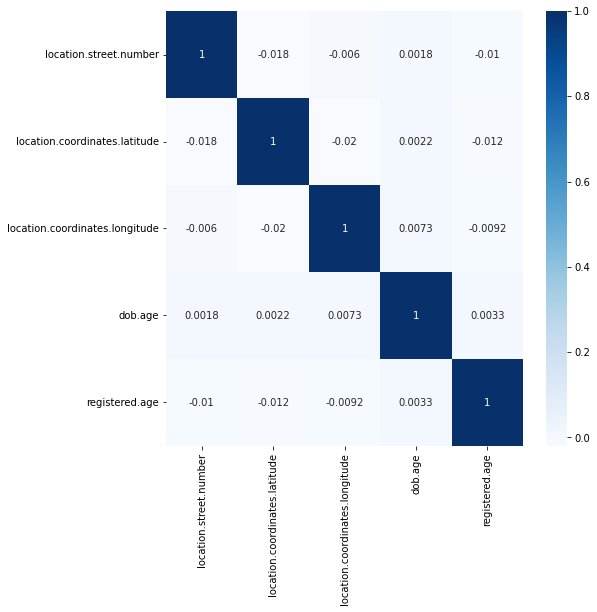

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
'''oops! zero correlations :/'''

In [26]:
'''unfortunately there are not any correlations beetwen our variables.
Lets find the main groups of users by gender, age and country/nationality'''
grp = df.groupby(['location.country'])
grp.agg({'dob.age': ['min', 'mean', 'max', 'count'],'registered.age': ['min', 'mean', 'max']})

dob.age                      registered.age               
                     min       mean max count            min       mean max
location.country                                                           
Australia             23  50.202422  77   578              2  10.723183  19
Brazil                23  49.438776  76   588              2  10.658163  19
Canada                23  49.750859  77   582              2  10.625430  19
Denmark               23  48.960884  77   588              2  10.534014  19
Finland               23  50.617264  77   614              2  10.483713  19
France                23  51.105263  77   570              2  10.480702  19
Germany               23  50.957895  77   570              2  10.382456  19
Iran                  23  48.996923  77   650              2  10.230769  19
Ireland               23  49.890335  77   538              2   9.905204  19
Netherlands           23  50.245115  77   563              2  10.788632  19
New Zealand           23  49.539964  77   563              2  10.724689  19
Norway                23  49.796446  77   619              2  10.264943  19
Spain                 23  50.000000  77   616              2  10.503247  19
Switzerland           23  49.513029  77   614              2  10.933225  19
Turkey                23  49.959790  76   572              2  10.250000  19
United Kingdom        23  50.165541  77   592              2  10.371622  19
United States         23  50.574614  77   583              2  10.557461  19

In [ ]:
'''as we can see above there is no any country with the big difference of a number of users (perhaps Ireland). 
The ages and the usage durations are the same as well for each contry.
Lets draw a barplot and check users nationality including their genders'''

<AxesSubplot:xlabel='nat', ylabel='count'>

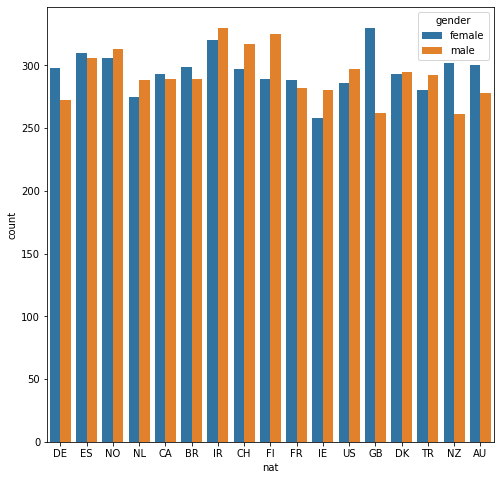

In [27]:
plt.figure(figsize=(8,8))
sns.countplot(x='nat',hue = 'gender', data=df)

<AxesSubplot:xlabel='dob.age', ylabel='Count'>

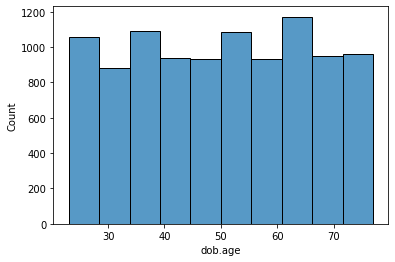

In [28]:
'''the same story here. The users are distributed equally by genders and countries/nationalities. 
but what if we have a main group by the users age range? hope this time I will be luckier'''

sns.histplot(df['dob.age'],bins=10)

<AxesSubplot:xlabel='dob.age', ylabel='gender'>

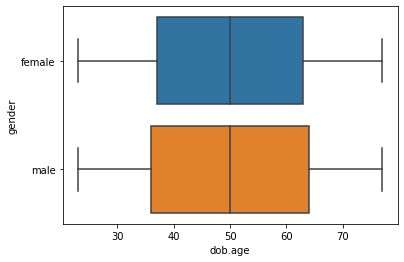

In [29]:
sns.boxplot(x='dob.age',y='gender',data=df)

### Conclusion:
##### As the dataset was generated randomly with 10k users, and the possibilityes for an each value are the same,
##### we were unable to find any categorical group with the most/less number of users. We have also observed that all variables are independent.
##### 

In [30]:
'''P. S.'''
print(df['name.first'].value_counts())
print(df['name.last'].value_counts())

'''I have nothing left to do, but add, that 
the most common first name is "Emma". Most common last name is "Walker" :) '''


Emma        35
Ella        33
Olivia      33
Victoria    31
Sara        30
            ..
Mathé        1
Torje        1
Thekla       1
Iolene       1
Devran       1
Name: name.first, Length: 3265, dtype: int64
Walker        44
Martin        42
Hansen        39
Taylor        37
كامياران      37
              ..
Dingemanse     1
Schink         1
Bienert        1
Botnen         1
Slobbe         1
Name: name.last, Length: 2630, dtype: int64


'I have nothing left to do, but add, that \nthe most common first name is "Ella". Most common last name is "Walker" :) '